In [0]:
import numpy as np 
import pandas as pd
import re

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_csv('/content/drive/My Drive/fake_job_postings.csv', engine='python',error_bad_lines=False)
df
df[df['fraudulent']==1].shape

Skipping line 5697: unexpected end of data


(237, 18)

In [0]:
dat = {'text': []}
data = pd.DataFrame(data=dat)

In [58]:
df.title.fillna('', inplace=True)
df.company_profile.fillna('', inplace=True)
df.description.fillna('', inplace=True)
df.requirements.fillna('', inplace=True)

data['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements']
data
data['fraudulent'] = df['fraudulent']
data[data['fraudulent']==1].shape


(237, 2)

In [59]:
from nltk.corpus import stopwords
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
stemmer = SnowballStemmer("english")
lem=WordNetLemmatizer()
data['text'] = data['text'].map(lambda x: re.sub(r"\W", " ",str(x)))
data['text'] = data['text'].map(lambda x: re.sub(r'[,\.!?]', " ",str(x)))
data['text'] = data['text'].map(lambda x: re.sub(r" \d+", " ",str(x)))
data['text'] = data['text'].map(lambda x: word_tokenize(x.lower()))
data['text'] = data['text'].map(lambda x: ' '.join(x))
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
data['lemm'] = data['text'].apply(lambda x: ' '.join([lem.lemmatize(y) for y in x.split()]))
data['stemm'] = data['lemm'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x.split()]))
data['text'] = data['stemm']

# data['text']=data['text'].str.lower()
# data['text']=data['text'].str.replace('\d+', '')
# data['text']=data['text'].str.replace(r"http\S+", '')
# data
# df[5690]
data

,text,fraudulent,lemm,stemm
0,market intern food52 creat groundbreak award w...,0,marketing intern food52 created groundbreaking...,market intern food52 creat groundbreak award w...
1,custom servic cloud video product second world...,0,customer service cloud video production second...,custom servic cloud video product second world...
2,commiss machineri assist cma valor servic prov...,0,commissioning machinery assistant cma valor se...,commiss machineri assist cma valor servic prov...
3,account execut washington dc passion improv qu...,0,account executive washington dc passion improv...,account execut washington dc passion improv qu...
4,bill review manag spotsourc solut llc global h...,0,bill review manager spotsource solution llc gl...,bill review manag spotsourc solut llc global h...
...,...,...,...,...
5690,field sale execut job titl field sale execut c...,0,field sale executive job title field sale exec...,field sale execut job titl field sale execut c...
5691,network market look make anywher month look pa...,1,network marketing looking make anywhere month ...,network market look make anywher month look pa...
5692,oud stage market summaview een jong bedrijf ui...,0,oud stage marketing summaview een jong bedrijf...,oud stage market summaview een jong bedrijf ui...
5693,mobil develop discoveroom grand vision chang h...,0,mobile developer discoveroom grand vision chan...,mobil develop discoveroom grand vision chang h...


In [0]:
data=data.drop(columns=['lemm', 'stemm'])

In [62]:
print(data[data['fraudulent']==1].shape)
data.dropna(inplace=True)
data[data['fraudulent']==1].shape
data

(237, 2)


,text,fraudulent
0,market intern food52 creat groundbreak award w...,0
1,custom servic cloud video product second world...,0
2,commiss machineri assist cma valor servic prov...,0
3,account execut washington dc passion improv qu...,0
4,bill review manag spotsourc solut llc global h...,0
...,...,...
5690,field sale execut job titl field sale execut c...,0
5691,network market look make anywher month look pa...,1
5692,oud stage market summaview een jong bedrijf ui...,0
5693,mobil develop discoveroom grand vision chang h...,0


In [0]:
# df['department'].shape

In [64]:
# from nltk.corpus import stopwords
# import nltk
# from nltk.stem.snowball import SnowballStemmer
# from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('wordnet')
# stop_words = set(stopwords.words('english')) 
# data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
# # Use English stemmer.
# stemmer = SnowballStemmer("english")
# lem=WordNetLemmatizer()

# data['lemm'] = data['text'].apply(lambda x: ' '.join([lem.lemmatize(y) for y in x.split()]))
# data['stemmed'] = data['lemm'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x.split()]))
# data['text'] = data['stemmed'].str.replace('[^A-z] ', '')
data

,text,fraudulent
0,market intern food52 creat groundbreak award w...,0
1,custom servic cloud video product second world...,0
2,commiss machineri assist cma valor servic prov...,0
3,account execut washington dc passion improv qu...,0
4,bill review manag spotsourc solut llc global h...,0
...,...,...
5690,field sale execut job titl field sale execut c...,0
5691,network market look make anywher month look pa...,1
5692,oud stage market summaview een jong bedrijf ui...,0
5693,mobil develop discoveroom grand vision chang h...,0


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer(stop_words='english')

In [0]:
X=vectorizer.fit_transform(data['text'])

In [0]:
# data['vector'] = vectorizer.transform(data['text'])
# print(vector.shape)
# print(vector)

In [68]:
data

,text,fraudulent
0,market intern food52 creat groundbreak award w...,0
1,custom servic cloud video product second world...,0
2,commiss machineri assist cma valor servic prov...,0
3,account execut washington dc passion improv qu...,0
4,bill review manag spotsourc solut llc global h...,0
...,...,...
5690,field sale execut job titl field sale execut c...,0
5691,network market look make anywher month look pa...,1
5692,oud stage market summaview een jong bedrijf ui...,0
5693,mobil develop discoveroom grand vision chang h...,0


In [0]:
from sklearn.model_selection import train_test_split

# splitting dataset into training and test data
# trainX, testX = train_test_split(X, test_size=0.30, random_state=1)
# trainY, testY = train_test_split(data['fraudulent'], test_size=0.30, random_state=1)
# trainX.shape

In [0]:
# trainX

In [0]:

# print()

In [0]:
# trainX

In [0]:
from sklearn.metrics import plot_confusion_matrix
def fitPredict(models_dict,X_train,y_train,X_test,y_test):
  acc={}
  spec={}
  sens={}
  model_save=None
  i=0
  #models_dict holds name and its function , like {'LR':LogsticRegression()}
  for name,model in models_dict.items():
    try:
      #fitting model on the train data
      model.fit(X_train,y_train)
      joblib.dump(model, name+'.pkl')
      #predicting model on X_test 
      model_save=model
      y_pred=model.predict(X_test)
      print('*'*100)
      print('Model:',name)
      #printing Confusion matrix an dAccuracy of each model
      print("Confusion Matrix: ")
      print(confusion_matrix(y_test, y_pred))
      print("Accuracy : ",accuracy_score(y_test,y_pred)*100)

      #mainitaing a dictionary of results of accuracy of each model to use it to plot in one systyem
      acc[name]=accuracy_score(y_test,y_pred)*100
      cm=confusion_matrix(y_test, y_pred)
      sens[name] = (cm[0,0]/(cm[0,0]+cm[0,1]))*100
      spec[name] = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
      print("Classificarion Report : ")
      print(classification_report(y_test, y_pred))
      
    except ValueError:
      print(name,'failed')
  
  #converting dictionaries to dataframes to have them handy
  acc=pd.DataFrame.from_dict(acc,orient='index').reset_index()
  sens=pd.DataFrame.from_dict(sens,orient='index').reset_index()
  spec=pd.DataFrame.from_dict(spec,orient='index').reset_index()
  # print(accuracy)
  acc.columns=['model_name','accuracy']
  sens.columns=['model_name','sensitivity']
  spec.columns=['model_name','specificity']
  
  #plotting accuracy,sensitivity,specificity of each model
  plt.figure(i+1,figsize=(16, 6))
  ax = sns.lineplot(data=acc, x='model_name', y='accuracy',legend='full')
  ax = sns.lineplot(data=sens, x='model_name', y='sensitivity',legend='full')
  ax = sns.lineplot(data=spec, x='model_name', y='specificity',legend='full')
  ax = sns.barplot(data=acc, x='model_name', y='accuracy')
  plt.title('Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')
  return model_save

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.externals import joblib 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.naive_bayes import MultinomialNB

In [0]:
models_dict={}
models_dict['LogisticRegression']       = LogisticRegression()
models_dict['Dtree']                    = DecisionTreeClassifier()
models_dict['NB']                       = MultinomialNB()
models_dict['RForest']                  = RandomForestClassifier()
models_dict['SVM']                      = SVC(gamma='auto')
models_dict['KNN']                      = KNeighborsClassifier()


In [76]:
X
Y=data.loc[:,data.columns=='fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print(sum(y_train.fraudulent))
y_train

200


,fraudulent
3252,0
1163,0
1162,0
3926,0
329,0
...,...
905,0
5192,0
3980,0
235,0


In [77]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
sm = SMOTE(random_state=12, sampling_strategy=0.5)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train.fraudulent)
undersample = NearMiss(sampling_strategy=1)
x_train_final, y_train_final = undersample.fit_sample(x_train_res, y_train_res)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [78]:
print(len(y_train_final)-sum(y_train_final))
print(sum(y_train_final))
print(len(y_train_res)-sum(y_train_res))
print(sum(y_train_res))

2320
2320
4640
2320


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


****************************************************************************************************
Model: LogisticRegression
Confusion Matrix: 
[[818   0]
 [ 30   7]]
Accuracy :  96.49122807017544
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       818
           1       1.00      0.19      0.32        37

    accuracy                           0.96       855
   macro avg       0.98      0.59      0.65       855
weighted avg       0.97      0.96      0.95       855

****************************************************************************************************
Model: Dtree
Confusion Matrix: 
[[811   7]
 [ 13  24]]
Accuracy :  97.6608187134503
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       818
           1       0.77      0.65      0.71        37

    accuracy                           0.98       855
   macro avg       0.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


****************************************************************************************************
Model: RForest
Confusion Matrix: 
[[818   0]
 [ 18  19]]
Accuracy :  97.89473684210527
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       818
           1       1.00      0.51      0.68        37

    accuracy                           0.98       855
   macro avg       0.99      0.76      0.83       855
weighted avg       0.98      0.98      0.98       855



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


****************************************************************************************************
Model: SVM
Confusion Matrix: 
[[818   0]
 [ 37   0]]
Accuracy :  95.67251461988305
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       818
           1       0.00      0.00      0.00        37

    accuracy                           0.96       855
   macro avg       0.48      0.50      0.49       855
weighted avg       0.92      0.96      0.94       855



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


****************************************************************************************************
Model: KNN
Confusion Matrix: 
[[817   1]
 [ 16  21]]
Accuracy :  98.01169590643275
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       818
           1       0.95      0.57      0.71        37

    accuracy                           0.98       855
   macro avg       0.97      0.78      0.85       855
weighted avg       0.98      0.98      0.98       855



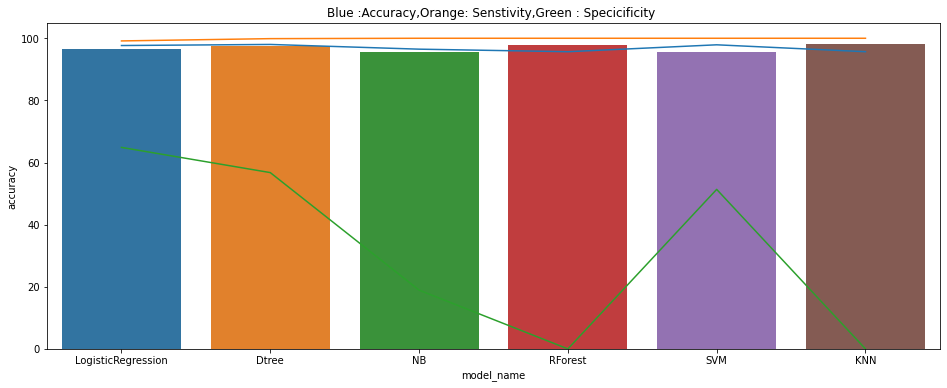

In [80]:
model_save=fitPredict(models_dict,X_train,y_train,X_test,y_test)

****************************************************************************************************
Model: LogisticRegression
Confusion Matrix: 
[[811   7]
 [  9  28]]
Accuracy :  98.12865497076024
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       818
           1       0.80      0.76      0.78        37

    accuracy                           0.98       855
   macro avg       0.89      0.87      0.88       855
weighted avg       0.98      0.98      0.98       855

****************************************************************************************************
Model: Dtree
Confusion Matrix: 
[[759  59]
 [ 17  20]]
Accuracy :  91.11111111111111
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       818
           1       0.25      0.54      0.34        37

    accuracy                           0.91       855
   macro avg       0

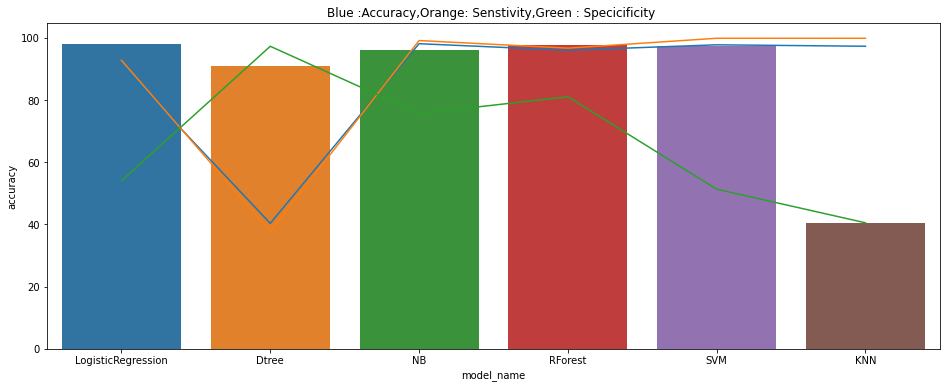

In [81]:
model_save=fitPredict(models_dict,x_train_final,y_train_final,X_test,y_test)